# Biodiversity Survey Spring 2023 - pH analysis

## Importing data <br />
Simply run each code block.

**Make sure csv files for pH measurement (e.g.``flowerbedpH-110323.csv``) are in the same directory, or point the ```readFile()``` function below to the correct directory <br />(e.g. ``C:\user\Documents\flowerbedpH-march.csv``)**  <br />

**If using Google Colab:** 
<br /> I find that it is easier to save the files to your own Google Drive and **mount** your drive to run this program (see below).



In [2]:
#File management
from os import path
#Data management
import pandas as pd 
#Libraries for plotting
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns 

def readFile(file):
    with open(path.abspath(file),'r') as csvfile:
        import_df = pd.read_csv(csvfile)
        return import_df

**For running on Google Colab** (Ignore the local machine box)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
df1 = readFile('/content/drive/My Drive/flowerbedpH-march.csv') #Where the data file is stored on your Google Drive
df2 = readFile('/content/drive/My Drive/flowerbedpH-april.csv')
df1.name = 'March 2023'
df2.name = 'April 2023'
display(df1,df2)

**For running on local machine** (Ignore the Colab box)

In [4]:
df1 = readFile('input/ph-input/flowerbedpH-march.csv') #Make sure this file is in the same directory as this notebook, or at least point it towards where it is saved
df2 = readFile('input/ph-input/flowerbedpH-april.csv')
df1.name = 'March 2023'
df2.name = 'April 2023'
display(df1,df2)

,Flower bed,Section,Read1,Read2,Mean pH,Std,95% CI
0,Right,Top,7.49,7.76,7.63,0.19,0.15
1,Right,Middle,7.27,7.73,7.50,0.33,0.26
2,Right,Bottom,7.14,7.66,7.40,0.37,0.29
3,Left,Top,7.72,7.91,7.82,0.13,0.11
4,Left,Middle,7.51,7.62,7.57,0.08,0.06
5,Left,Bottom,7.55,7.54,7.55,0.01,0.01


,Flower bed,Section,Read1,Read2,Read3,Mean pH,Std,95% CI
0,Right,Top,7.37,7.38,7.63,7.46,0.15,0.12
1,Right,Middle,7.51,7.31,7.63,7.48,0.16,0.13
2,Right,Bottom,7.40,7.21,7.64,7.42,0.22,0.17
3,Left,Top,7.60,7.36,7.51,7.49,0.12,0.10
4,Left,Middle,7.21,7.60,7.75,7.52,0.28,0.22
5,Left,Bottom,6.94,7.47,7.48,7.30,0.31,0.25


In [5]:
mar_right = df1[0:3]
mar_left = df1[3:6]
apr_right = df2[0:3]
apr_left = df2[3:]

In [6]:
#Simple stats
df1_mean = np.mean(df1.loc[:,'Read1':'Read2'], axis = 1).round(2)
df2_mean = np.mean(df2.loc[:,'Read1':'Read3'],axis=1).round(2)
df1_std = np.std(df1.loc[:,'Read1':'Read2'],axis=1)
df2_std = np.std(df2.loc[:,'Read1':'Read3'],axis=1)

In [7]:
mar_right_top = list(df1.loc[0,'Read1':'Read2'])
mar_right_mid = list(df1.loc[1,'Read1':'Read2'])
mar_right_bot = list(df1.loc[2,'Read1':'Read2'])

mar_left_top = list(df1.loc[3,'Read1':'Read2'])
mar_left_mid = list(df1.loc[4,'Read1':'Read2'])
mar_left_bot = list(df1.loc[5,'Read1':'Read2'])

apr_right_top = list(df2.loc[0,'Read1':'Read3'])
apr_right_mid = list(df2.loc[1,'Read1':'Read3'])
apr_right_bot = list(df2.loc[2,'Read1':'Read3'])

apr_left_top = list(df2.loc[3,'Read1':'Read3'])
apr_left_mid = list(df2.loc[4,'Read1':'Read3'])
apr_left_bot = list(df2.loc[5,'Read1':'Read3'])

In [8]:
stats.shapiro(df1.loc[:,'Read1':'Read2'])

ShapiroResult(statistic=0.9519514441490173, pvalue=0.6656675338745117)

In [9]:
[round(np.var(x,ddof=1),2) for x in [mar_right_top,apr_right_top]]
stats.bartlett(mar_right_bot,apr_right_bot)

BartlettResult(statistic=0.2954064511999392, pvalue=0.5867765982789712)

In [11]:
#Multivariate analysis, determining differences between flowerbeds per section
anova_results = []
def oneWayANOVA(x,y,*z):
    return stats.f_oneway(x,y,*z)
fval, right_top_anova = oneWayANOVA(mar_right_top,apr_right_top)
print("Right bed, top:",fval)
fval, right_mid_anova = oneWayANOVA(mar_right_mid,apr_right_mid)
print("Right bed, middle:",fval)
fval, right_bot_anova = oneWayANOVA(mar_right_bot,apr_right_bot)
print("Right bed, bottom:",fval)
fval,left_top_anova = oneWayANOVA(mar_left_top,apr_right_top)
print("Left bed, top:",fval)
fval,left_mid_anova = oneWayANOVA(mar_left_mid,apr_left_mid)
print("Left bed, mid:",fval)
fval,left_bot_anova = oneWayANOVA(mar_left_bot,apr_left_bot)
print("Left bed, bottom:",fval)
anova_results = [right_top_anova,right_mid_anova,right_bot_anova, left_top_anova,left_mid_anova,left_bot_anova]
for x in anova_results: print('\n',x)

Right bed, top: 1.2274264245460267
Right bed, middle: 0.00632644453816971
Right bed, bottom: 0.004384682841274526
Left bed, top: 7.383075671277453
Left bed, mid: 0.04515329823474776
Left bed, bottom: 1.1628633784373625

 0.3487491531491281

 0.9416125500654745

 0.9513709518863745

 0.07272209688632446

 0.8453416891147825

 0.3598520737072239


In [11]:
                                #0              1               2          3
top_tukey = stats.tukey_hsd(mar_right_top, apr_right_top, mar_left_top, apr_left_top) #Look for 0 - 1; 2 - 3;0 - 2; 1 - 3 comparisons
#F-stat   P-val   LowerCI   UpperCI
#0.165     0.627    -0.295     0.625 (0-1:Mar+Apr-Right-Top)
#-0.190     0.593    -0.694     0.314 (0-2:Mar-R/L-Top)
# 0.135     0.747    -0.325     0.595 (0-3:MarR+AprL-Top)
#-0.355     0.128    -0.815     0.105 (1-2):MarL+AprR-Top
#-0.030     0.994    -0.442     0.382 (1-3:Apr-R/L-Top)

mid_tukey = stats.tukey_hsd(mar_right_mid, apr_right_mid, mar_left_mid, apr_left_mid)
bot_tukey = stats.tukey_hsd(mar_right_bot, apr_right_bot, mar_left_bot, apr_left_bot)
#print(f"{top_tukey}\n{mid_tukey}\n{bot_tukey}") #No significant difference found (p > 0.05) in soil pH between March and April (top)
mar_right_tukey = stats.tukey_hsd(mar_right_top,mar_right_mid,mar_right_bot) #No sig diff
apr_right_tukey = stats.tukey_hsd(apr_right_top,apr_right_mid,apr_right_bot) #No sig diff

mar_left_tukey = stats.tukey_hsd(mar_left_top,mar_left_mid,mar_left_bot) #No sig diff
apr_left_tukey = stats.tukey_hsd(apr_left_top,apr_left_mid,apr_left_bot) #No sig diff

print("Top beds:",top_tukey)
print("Mid beds:",mid_tukey)
print("Bot beds:",bot_tukey)

Top beds: Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.165     0.627    -0.295     0.625
 (0 - 2)     -0.190     0.593    -0.694     0.314
 (0 - 3)      0.135     0.747    -0.325     0.595
 (1 - 0)     -0.165     0.627    -0.625     0.295
 (1 - 2)     -0.355     0.128    -0.815     0.105
 (1 - 3)     -0.030     0.994    -0.442     0.382
 (2 - 0)      0.190     0.593    -0.314     0.694
 (2 - 1)      0.355     0.128    -0.105     0.815
 (2 - 3)      0.325     0.168    -0.135     0.785
 (3 - 0)     -0.135     0.747    -0.595     0.325
 (3 - 1)      0.030     0.994    -0.382     0.442
 (3 - 2)     -0.325     0.168    -0.785     0.135

Mid beds: Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.017     1.000    -0.713     0.746
 (0 - 2)     -0.065     0.991    -0.864     0.734
 (0 - 3)     -0.020     1.000    -0.749    

## Histogram

Just to see how data is distributed.

<Axes: ylabel='Count'>

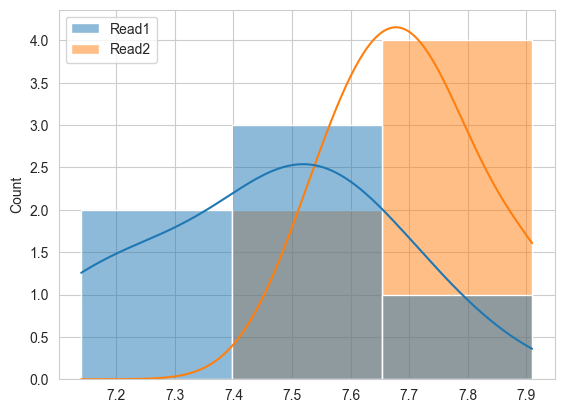

In [70]:
#For March
sns.histplot(df1[['Read1','Read2']],kde=True,bins=3)

<Axes: ylabel='Count'>

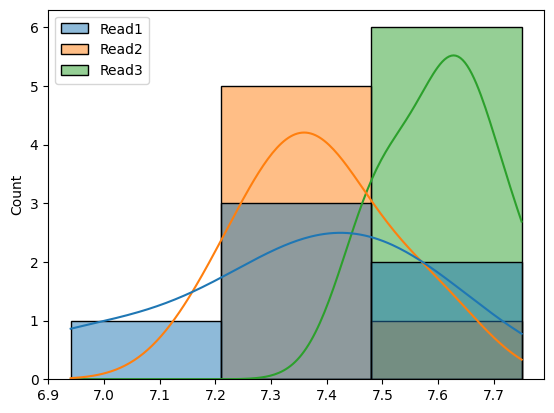

In [19]:
#For April
sns.histplot(df2[df2.columns[df2.columns.str.contains("Read")]],kde=True,bins=3)

## Bar charts

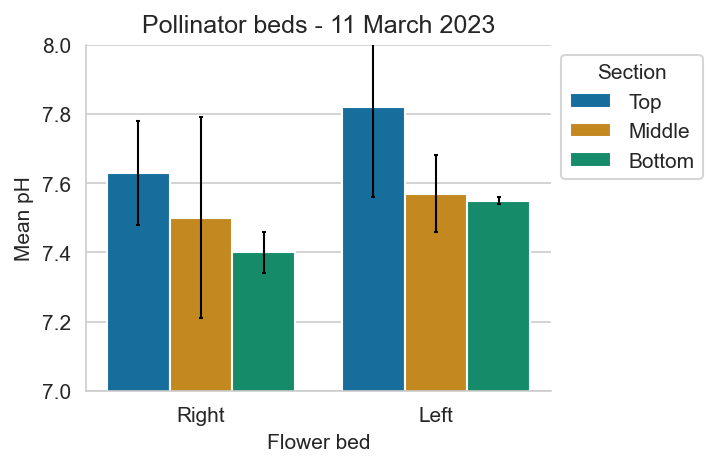

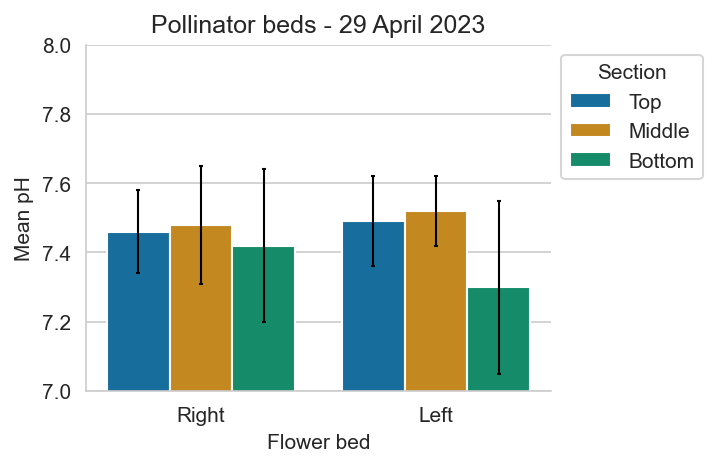

In [98]:
def plotpHBars(df,title,): #Requires a dataframe and a plot title in string
    plt.figure(figsize=(4,3),dpi=150)
    sns.set_style('whitegrid')
    ax = sns.barplot(data=df, x='Flower bed', y='Mean pH', hue='Section', palette='colorblind')
    ax.set(ylim=(7,8))
    x_coords = [p.get_x() + 0.5*p.get_width() for p in ax.patches]
    y_coords = [p.get_height() for p in ax.patches]
    ax.errorbar(x=x_coords, y=y_coords, yerr=df["95% CI"], fmt="none", c= "k",
                elinewidth=1,capsize=1)
    sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1)) #Place legend next to plot, rather than overlaying on it
    sns.despine()
    plt.title(title)
    plt.show()

plotpHBars(df1,'Pollinator beds - 11 March 2023')
plotpHBars(df2,'Pollinator beds - 29 April 2023')

**Saving plots** <br/>
Hover over the figures and press the right-most icon (floppy disk) to save as an image to your device.

# pH Heatmaps

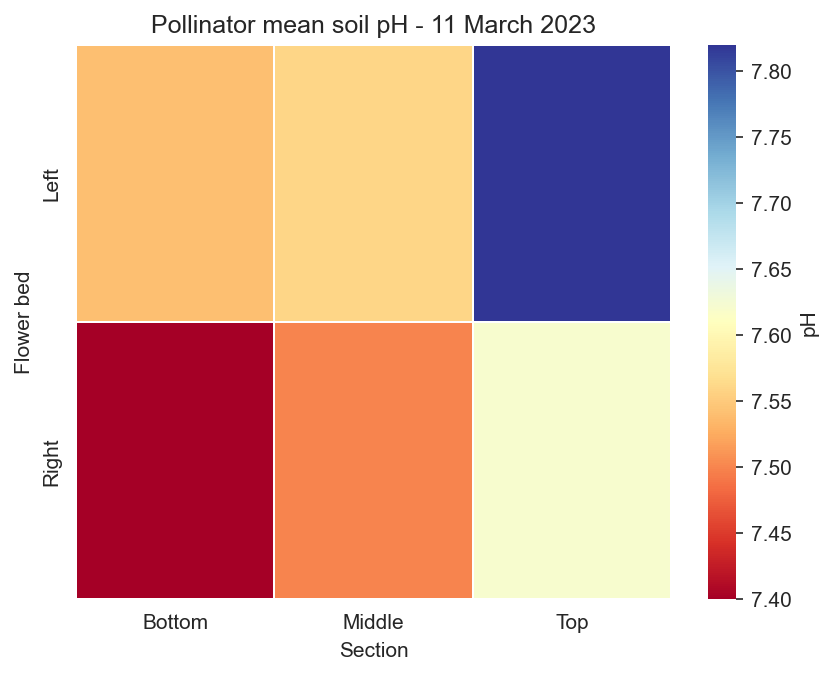

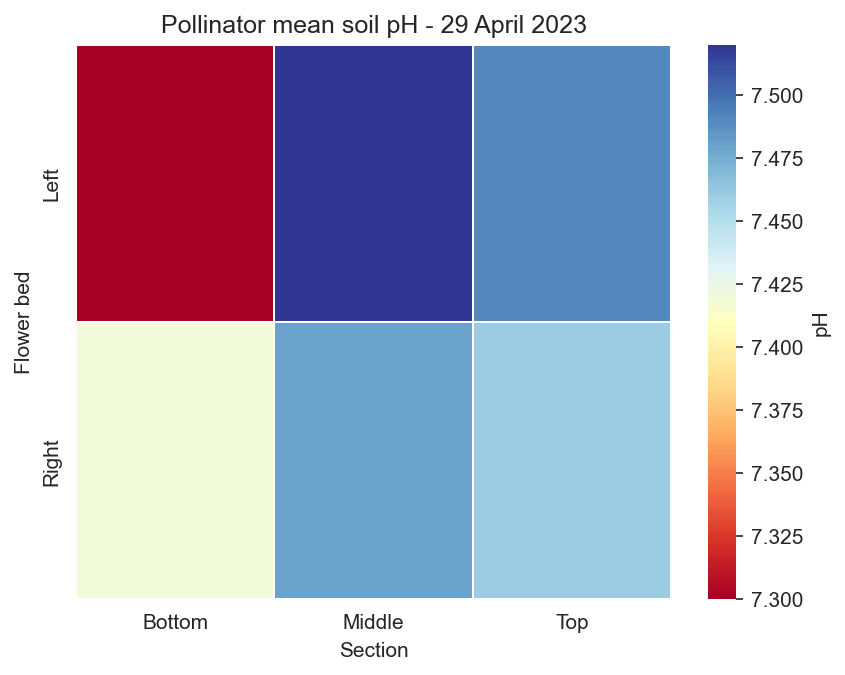

In [135]:
def plotHeat(df,title):
    pivot_df = df.pivot_table(values='Mean pH',index='Flower bed',columns='Section')
    plt.figure(dpi=150)
    sns.heatmap(pivot_df,cmap="RdYlBu",
    linecolor='white',linewidths='0.1',cbar_kws={'label':'pH'})
    plt.title(title)
    plt.show()
plotHeat(df1,'Pollinator mean soil pH - 11 March 2023')
plotHeat(df2,'Pollinator mean soil pH - 29 April 2023')

# Correlation plots
**NOT ACTUAL DATA** <br />
Just some things I tested for fun. Would be nice to compare between actual numeric distances to be able to determine a quantitatived relationship.

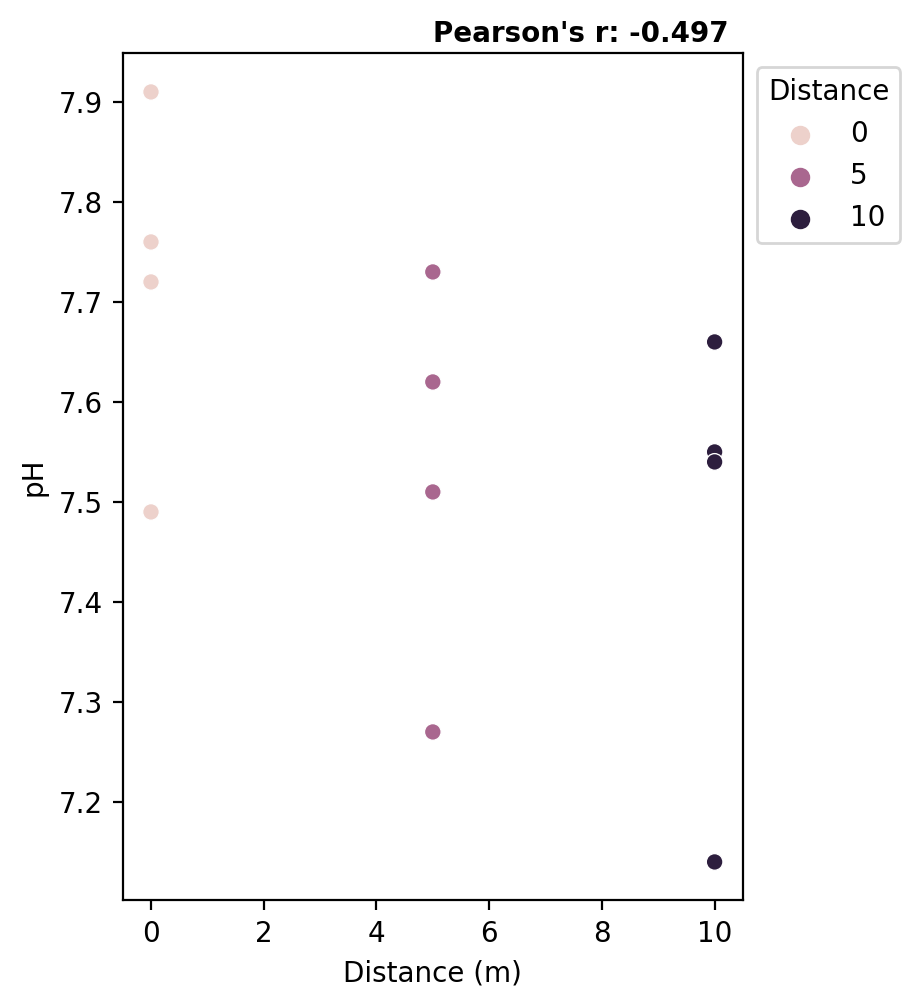

In [4]:
plt.figure(figsize=(4,5.5),dpi=200)
df_filtered = df_test[['Distance','Read1','Read2']]

df_filtered = df_filtered.melt("Distance",var_name="Read",value_name='pH')
#sns.heatmap(df_test[['Distance','Mean pH']].corr(),annot=True)
ax = sns.scatterplot(data=df_filtered,x='Distance',y='pH',hue='Distance')
sns.move_legend(ax,"upper left",bbox_to_anchor=(1,1))
r, p = sp.stats.pearsonr(x=df_filtered['Distance'],y=df_filtered['pH'])
plt.text(5,7.96,f"Pearson's r: {round(r,3)}",weight='semibold')
plt.xlabel("Distance (m)")
plt.show()

<AxesSubplot:>

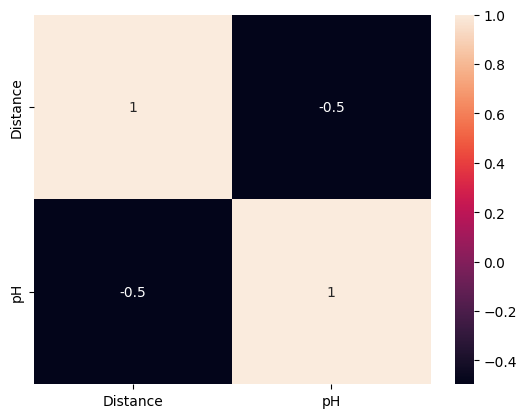

In [6]:
sns.heatmap(df_filtered.corr(),annot=True)

In [ ]:
def plotHeat(df):
    pivot_df = df.pivot_table(values='Mean pH',index='Flower bed',columns='Section')
    plt.figure(dpi=150)
    sns.heatmap(pivot_df,cmap="RdYlBu",
    linecolor='white',linewidths='0.1',cbar_kws={'label':'pH'})
    plt.title('Pollinator mean soil pH - 11 March 2023')
    plt.show()